In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
import shap

In [4]:
data = pd.read_csv("C:/Users/paul8/Downloads/explain.csv")
data.head()

,height,width,smokes,color,time_since_last_check,fail
0,37.454012,37.364082,0,1,29.891204,False
1,95.071431,33.291210,0,0,9.481778,False
2,73.199394,17.615391,0,2,12.635922,False
3,59.865848,60.726667,0,0,18.067113,False
4,15.601864,47.662416,0,0,20.365333,False


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['fail'],axis=1), data['fail'], test_size=0.33, random_state=42)
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

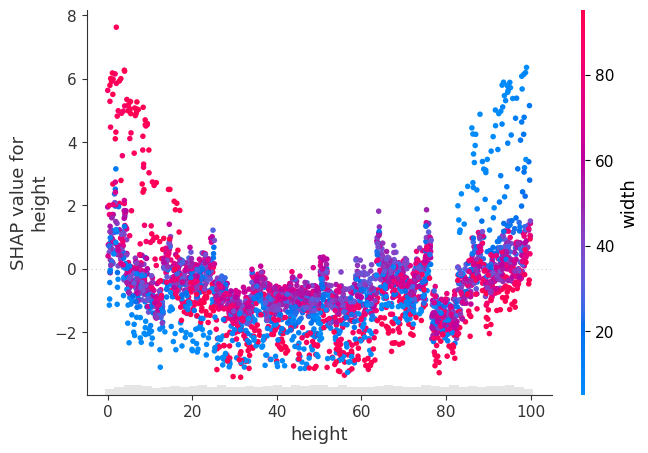

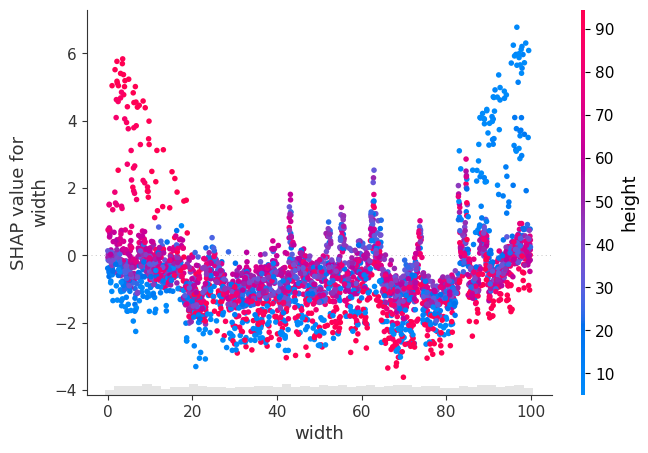

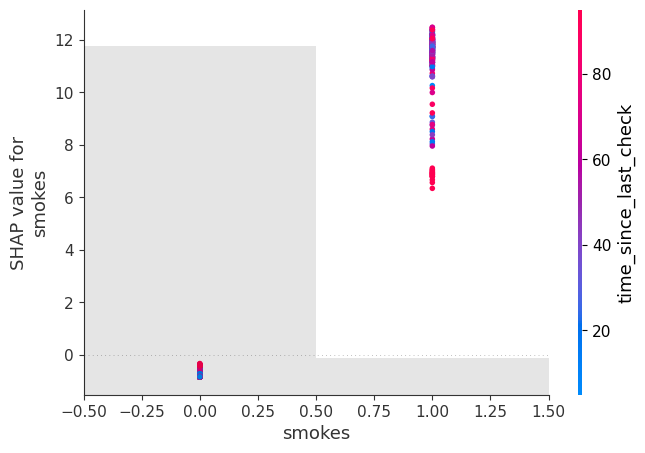

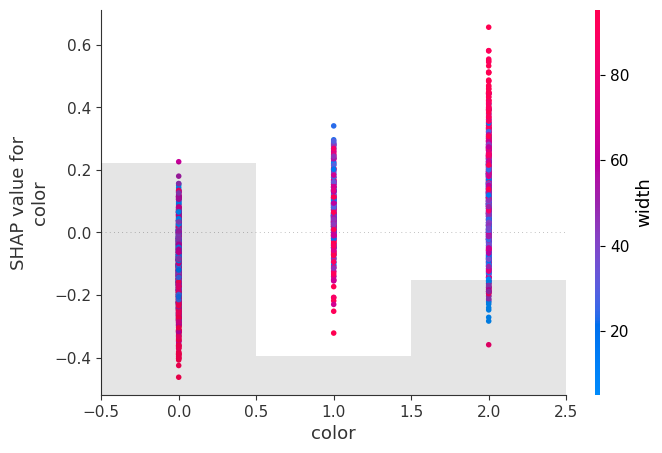

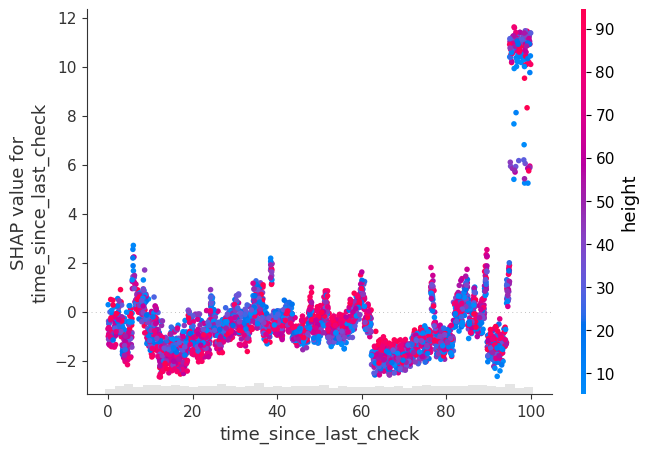

In [13]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
for col in X_test.columns:
    shap.plots.scatter(shap_values[:, col], color=shap_values,x_jitter=0)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


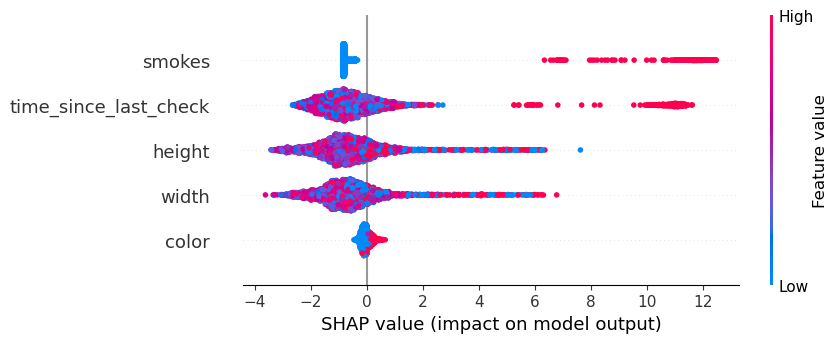

In [9]:
shap.plots.beeswarm(shap_values)

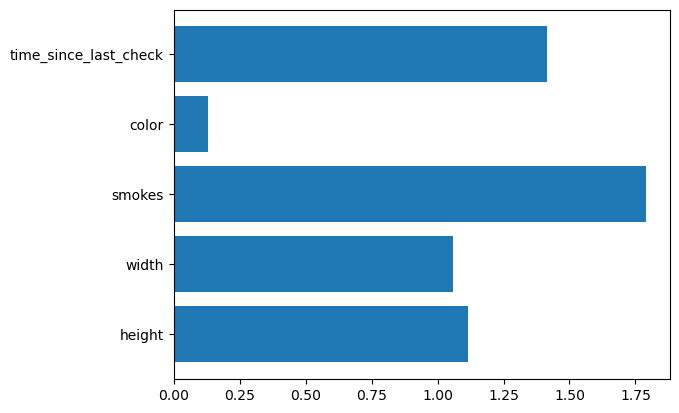

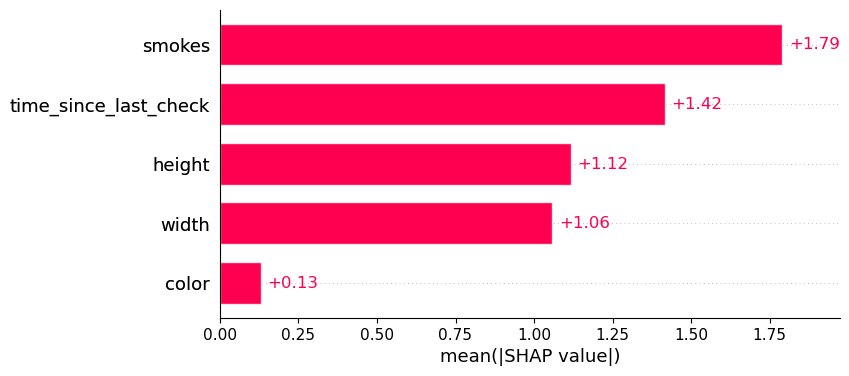

In [10]:
global_shap=np.mean(np.abs(shap_values.values),axis=0)
plt.barh(X_test.columns,global_shap)
plt.show()
shap.plots.bar(shap_values)

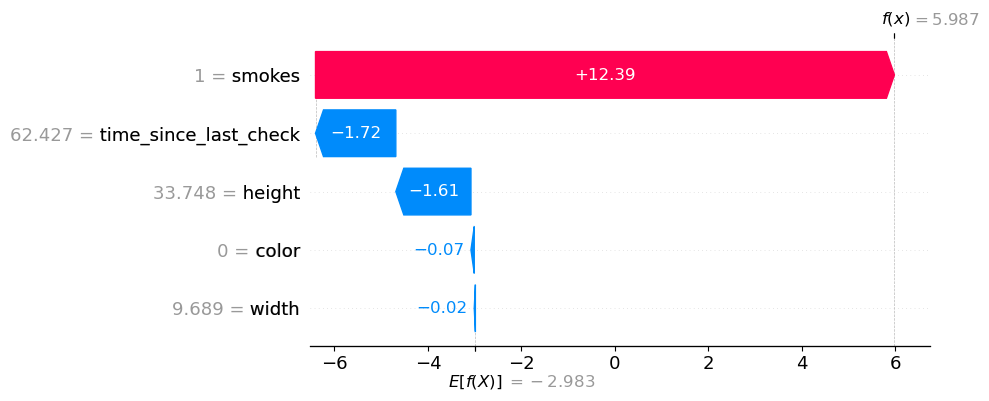

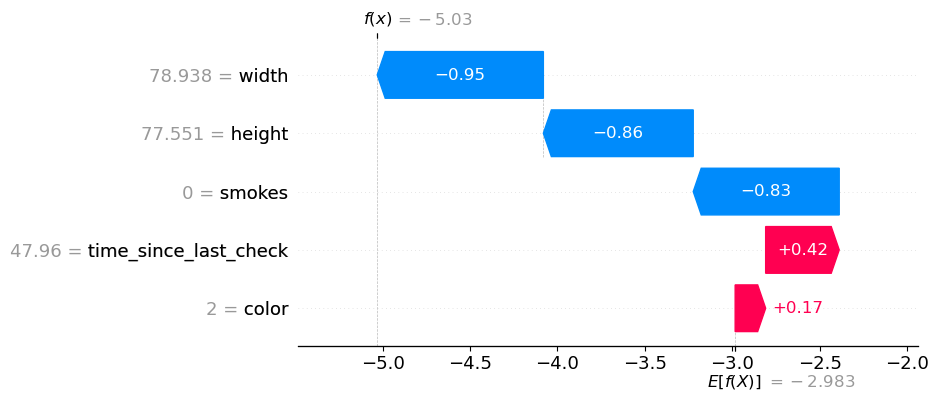

In [11]:
shap.plots.waterfall(shap_values[0], max_display=10)
shap.plots.waterfall(shap_values[1], max_display=10)

In [12]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted     0    1
Actual              
False      2683   15
True         35  567
